# HW3-1


Import relevant libraries 

In [2]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

Generate 1000 samples from two classes of multivaraite normals as well as their associated labels positive and negative

In [3]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]],size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0],cov=[[1,0.5],[0.5,1]],size = num_samples_per_class)

inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),np.ones((num_samples_per_class,1),dtype="float32")))

**Define Model**
* Layer variables
* ReLu
* Forward pass model

In [53]:
input_dim = 2
hidden_dim = 5
output_dim = 1

W1 = tf.Variable(tf.random.uniform(shape=(input_dim,hidden_dim)))
b1 = tf.Variable(tf.random.uniform(shape=(hidden_dim,)))

W2 = tf.Variable(tf.random.uniform(shape=(hidden_dim,output_dim)))
b2 = tf.Variable(tf.random.uniform(shape=(output_dim,)))

**Homework Part** define a TensorFlow ReLu

$
Relu(x) = max(x,0)
$

In [26]:
def ReLu(x):
    return(tf.math.maximum(0,x))

In [32]:
def model(inputs):
    hidden = ReLu(tf.matmul(inputs,W1)+b1)
    return tf.matmul(hidden,W2)+b2

In [33]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets-predictions) 
    return tf.reduce_mean(per_sample_losses)

In [46]:
def training_step(inputs,targets,learning_rate):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions,targets)
    grad_loss_wrt_W1, grad_loss_wrt_b1 ,grad_loss_wrt_W2, grad_loss_wrt_b2  = tape.gradient(loss,[W1,b1,W2,b2])
    W1.assign_sub(grad_loss_wrt_W1 * learning_rate)
    b1.assign_sub(grad_loss_wrt_b1* learning_rate)
    W2.assign_sub(grad_loss_wrt_W2 * learning_rate)
    b2.assign_sub(grad_loss_wrt_b2* learning_rate)
    return loss

Learning rate `0.05`

In [57]:
# Reset parameters of model
W1 = tf.Variable(tf.random.uniform(shape=(input_dim,hidden_dim)))
b1 = tf.Variable(tf.random.uniform(shape=(hidden_dim,)))
W2 = tf.Variable(tf.random.uniform(shape=(hidden_dim,output_dim)))
b2 = tf.Variable(tf.random.uniform(shape=(output_dim,)))

losses = [] #Initialize blank list to store loss values
learning_rate = 0.05

for step in range(400):
    loss = training_step(inputs,targets,learning_rate)
    losses.append(loss)
    print(f"loss at step {step}: {loss:4f}")

loss at step 0: 76.358231
loss at step 1: 3.896795
loss at step 2: 1.301066
loss at step 3: 0.840102
loss at step 4: 0.696481
loss at step 5: 0.614691
loss at step 6: 0.557292
loss at step 7: 0.514452
loss at step 8: 0.480402
loss at step 9: 0.453352
loss at step 10: 0.431234
loss at step 11: 0.412955
loss at step 12: 0.397528
loss at step 13: 0.384329
loss at step 14: 0.373414
loss at step 15: 0.364038
loss at step 16: 0.355761
loss at step 17: 0.348426
loss at step 18: 0.341864
loss at step 19: 0.336091
loss at step 20: 0.330972
loss at step 21: 0.326297
loss at step 22: 0.322103
loss at step 23: 0.318303
loss at step 24: 0.314856
loss at step 25: 0.311702
loss at step 26: 0.308819
loss at step 27: 0.306173
loss at step 28: 0.303716
loss at step 29: 0.301443
loss at step 30: 0.299312
loss at step 31: 0.297280
loss at step 32: 0.295343
loss at step 33: 0.293494
loss at step 34: 0.291731
loss at step 35: 0.289956
loss at step 36: 0.288193
loss at step 37: 0.286461
loss at step 38: 0.28

loss at step 347: 0.021396
loss at step 348: 0.021388
loss at step 349: 0.021380
loss at step 350: 0.021372
loss at step 351: 0.021364
loss at step 352: 0.021357
loss at step 353: 0.021349
loss at step 354: 0.021342
loss at step 355: 0.021334
loss at step 356: 0.021327
loss at step 357: 0.021320
loss at step 358: 0.021312
loss at step 359: 0.021305
loss at step 360: 0.021298
loss at step 361: 0.021291
loss at step 362: 0.021284
loss at step 363: 0.021277
loss at step 364: 0.021270
loss at step 365: 0.021264
loss at step 366: 0.021257
loss at step 367: 0.021250
loss at step 368: 0.021244
loss at step 369: 0.021237
loss at step 370: 0.021230
loss at step 371: 0.021224
loss at step 372: 0.021218
loss at step 373: 0.021211
loss at step 374: 0.021205
loss at step 375: 0.021199
loss at step 376: 0.021192
loss at step 377: 0.021186
loss at step 378: 0.021180
loss at step 379: 0.021174
loss at step 380: 0.021168
loss at step 381: 0.021162
loss at step 382: 0.021156
loss at step 383: 0.021150
l

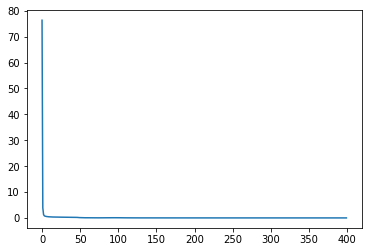

In [58]:
plt.plot(range(400),losses)
plt.show()

Learning rate `0.1`

In [70]:
# Reset parameters of model
W1 = tf.Variable(tf.random.uniform(shape=(input_dim,hidden_dim)))
b1 = tf.Variable(tf.random.uniform(shape=(hidden_dim,)))
W2 = tf.Variable(tf.random.uniform(shape=(hidden_dim,output_dim)))
b2 = tf.Variable(tf.random.uniform(shape=(output_dim,)))

losses = [] #Initialize blank list to store loss values
learning_rate = 0.1

for step in range(400):
    loss = training_step(inputs,targets,learning_rate)
    losses.append(loss)
    print(f"loss at step {step}: {loss:4f}")

loss at step 0: 76.358231
loss at step 1: 19.171474
loss at step 2: 6.603267
loss at step 3: 2.025781
loss at step 4: 1.414198
loss at step 5: 1.071422
loss at step 6: 0.868048
loss at step 7: 0.732934
loss at step 8: 0.635990
loss at step 9: 0.567993
loss at step 10: 0.515927
loss at step 11: 0.477519
loss at step 12: 0.446541
loss at step 13: 0.421026
loss at step 14: 0.399736
loss at step 15: 0.381685
loss at step 16: 0.367050
loss at step 17: 0.355280
loss at step 18: 0.345980
loss at step 19: 0.338492
loss at step 20: 0.332020
loss at step 21: 0.326286
loss at step 22: 0.321142
loss at step 23: 0.316481
loss at step 24: 0.312230
loss at step 25: 0.308380
loss at step 26: 0.304944
loss at step 27: 0.301796
loss at step 28: 0.298976
loss at step 29: 0.296366
loss at step 30: 0.293961
loss at step 31: 0.291714
loss at step 32: 0.289595
loss at step 33: 0.287594
loss at step 34: 0.285727
loss at step 35: 0.284043
loss at step 36: 0.282444
loss at step 37: 0.280945
loss at step 38: 0.2

loss at step 309: 0.249897
loss at step 310: 0.249896
loss at step 311: 0.249895
loss at step 312: 0.249893
loss at step 313: 0.249892
loss at step 314: 0.249891
loss at step 315: 0.249890
loss at step 316: 0.249889
loss at step 317: 0.249888
loss at step 318: 0.249886
loss at step 319: 0.249885
loss at step 320: 0.249884
loss at step 321: 0.249883
loss at step 322: 0.249883
loss at step 323: 0.249883
loss at step 324: 0.249883
loss at step 325: 0.249883
loss at step 326: 0.249883
loss at step 327: 0.249883
loss at step 328: 0.249883
loss at step 329: 0.249883
loss at step 330: 0.249882
loss at step 331: 0.249882
loss at step 332: 0.249882
loss at step 333: 0.249882
loss at step 334: 0.249882
loss at step 335: 0.249882
loss at step 336: 0.249882
loss at step 337: 0.249882
loss at step 338: 0.249882
loss at step 339: 0.249882
loss at step 340: 0.249882
loss at step 341: 0.249882
loss at step 342: 0.249882
loss at step 343: 0.249882
loss at step 344: 0.249882
loss at step 345: 0.249882
l

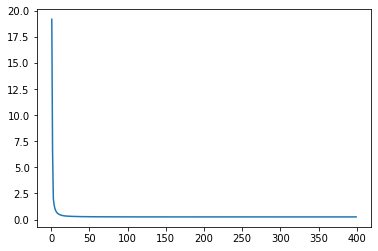

In [71]:
plt.plot(range(400),losses)
plt.show()

Learning rate `0.5`

In [63]:
# Reset parameters of model
W1 = tf.Variable(tf.random.uniform(shape=(input_dim,hidden_dim)))
b1 = tf.Variable(tf.random.uniform(shape=(hidden_dim,)))
W2 = tf.Variable(tf.random.uniform(shape=(hidden_dim,output_dim)))
b2 = tf.Variable(tf.random.uniform(shape=(output_dim,)))

losses = [] #Initialize blank list to store loss values
learning_rate = 0.5

for step in range(400):
    loss = training_step(inputs,targets,learning_rate)
    losses.append(loss)
    print(f"loss at step {step}: {loss:4f}")

loss at step 0: 76.358231
loss at step 1: 16241.559570
loss at step 2: 211007193088.000000
loss at step 3: 3203730638488717738566013232873472.000000
loss at step 4:  inf
loss at step 5:  nan
loss at step 6:  nan
loss at step 7:  nan
loss at step 8:  nan
loss at step 9:  nan
loss at step 10:  nan
loss at step 11:  nan
loss at step 12:  nan
loss at step 13:  nan
loss at step 14:  nan
loss at step 15:  nan
loss at step 16:  nan
loss at step 17:  nan
loss at step 18:  nan
loss at step 19:  nan
loss at step 20:  nan
loss at step 21:  nan
loss at step 22:  nan
loss at step 23:  nan
loss at step 24:  nan
loss at step 25:  nan
loss at step 26:  nan
loss at step 27:  nan
loss at step 28:  nan
loss at step 29:  nan
loss at step 30:  nan
loss at step 31:  nan
loss at step 32:  nan
loss at step 33:  nan
loss at step 34:  nan
loss at step 35:  nan
loss at step 36:  nan
loss at step 37:  nan
loss at step 38:  nan
loss at step 39:  nan
loss at step 40:  nan
loss at step 41:  nan
loss at step 42:  nan

loss at step 399:  nan


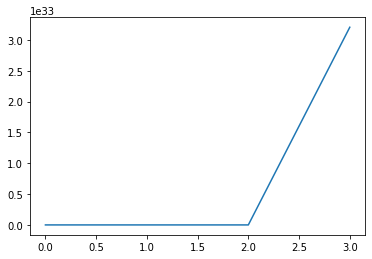

In [69]:
plt.plot(range(400),losses)
plt.show()

In [66]:
range(10)[3:10][0
        ]

4